# Sistem Penilaian Kelayakan Pembelian Mobil Menggunakan Metode Random Forest

# Pendahuluan

Mengevaluasi kelayakan mobil sebelum membeli merupakan peran penting supaya tidak mengalami penyesalsan setelah membeli. Biasanya mengevaluasi mobil secara manual cukup menyulitkan dan memakan waktu bagi calon pembeli mobil karena banyak sekali pertimbangan yang perlu dianalisis. Untuk mengatasi masalah tersebut saya akan membuat suatu Sistem Penilaian Kelayakan Pembelian Mobil Menggunakan Metode Gaussian Naive Bayes, diharapkan model ini dapat membantu calon pembeli mobil / user dalam menentukan pilihannya dalan membeli mobil.

# Data Undertanding

## Sumber Data

Saya mendapatkan dataset car evaluation dari UCI dataset (https://archive.ics.uci.edu/dataset/19/car+evaluation) 

Car Evaluation adalah dataset berisi evaluasi mobil layak dibeli atau tidak dengan berbagai fitur sebagai pertimbangannya. Pembuat dataset yaitu Marko Bohanec dan berlisensi oleh Creative Commons Attribution 4.0 International (CC BY 4.0)

Creative Commons (CC) adalah organisasi nirlaba internasional yang didedikasikan untuk membantu membangun dan mempertahankan pengetahuan dan budaya bersama yang berkembang. Bersama dengan jaringan anggota yang luas dan berbagai mitra, kami membangun kapasitas, mengembangkan solusi praktis, dan mengadvokasi pembagian pengetahuan dan budaya secara terbuka yang lebih baik untuk kepentingan publik. Sebagai bagian dari pekerjaan ini, kami membantu mengatasi hambatan hukum dalam berbagi pengetahuan dan kreativitas untuk mengatasi tantangan yang paling mendesak di dunia.

 Dataset berasal dari model keputusan hirarkis sederhana yang awalnya dikembangkan untuk demonstrasi DEX, M. Bohanec, V. Rajkovic: Sistem Pakar untuk pengambilan keputusan. Sistemica 1(1), pp. 145-157, 1990.).

## Integrasi Data

untuk mengambil data agar dapat diolah, perlu untuk penginstallan package yang telah disediakan oleh UCI Dataset. Instalasi dilakukan berguna untuk menarik data yang berasal dari UCI dataset agar dapat diolah. 

peritah untuk mengambil data dari UCI dataset dapat di lihat ketika kita menekan tombol import in python pada datase yang kita inginkan dan kita perlu mengikuti perintah tersebut agar data dapat diambil dari UCI dataset.

contoh pengambilan data dari UCI dataset dapat dilihat pada gambar dan perintah berkut

<img src="car_eval/sumber_data.png" width="" align="" />

In [1]:
pip install ucimlrepo


[notice] A new release of pip is available: 23.1.2 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
data = car_evaluation.data.original 

# menyimpan hasil komputasi ke dalam csv
data.to_csv("car_eval.csv", index=False)

In [3]:
import pandas as pd

# Membaca file CSV menjadi dataframe
df = pd.read_csv("car_eval.csv")

# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
# menampilkan data teratas
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Eksplorasi Data (Visualisasi)

untuk memudahkan dalam memahami dataset ,ada baiknya kita ditampilkan dengan visual yang dapat dipahami oleh semua orang,pada visualisasi data kami melakukan perintah berikut agar tampilan data dapat dipahami dengan lebih mudah.

In [5]:
display(df) #display dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


mengidentifikasi values yang berbeda di setiap kolom fitur :

In [6]:
# Get a count of the number of unique values for each feature column in the DataFrame.
feature_names = list(df.columns.values[:-1])
for feature in feature_names:
    unique_count = df[feature].nunique()
    unique_vals = df[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


Semua kolom fitur berisi data ordinal dengan tiga sampai empat values. Data ordinal mirip dengan data kategorikal yang memiliki jumlah nilai yang kecil dan tetap, tetapi perbedaannya adalah data ordinal memiliki urutan yang jelas.

mengidentifikasi values yang berbeda di setiap kolom label:

In [7]:
# Get a count of the number of unique values for the label column.
label_name = df.columns.values[-1]
print("{}: {} values, {}".format(label_name, df[label_name].nunique(), df[label_name].unique()))

class: 4 values, ['unacc' 'acc' 'vgood' 'good']


Ada empat Kelas dalam kolom label dan seperti kolom fitur dan tipenya juga ordinal.

berikutnya menampilkan jumlah data yang dimiliki oleh setiap kelas :

/tmp/ipykernel_104/3294167888.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=kelas_count.index, y=kelas_count.values, palette='deep')


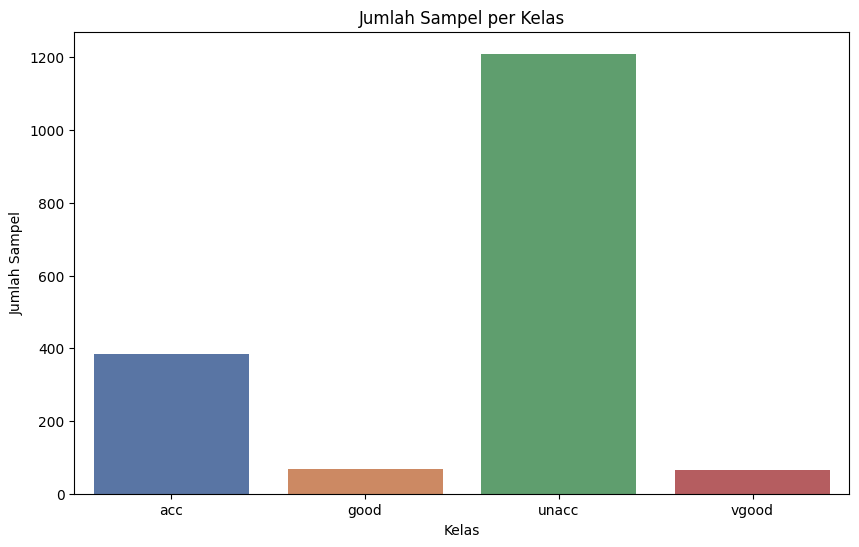

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah data per kelas
kelas_count = df['class'].value_counts().sort_index()

# Plot menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=kelas_count.index, y=kelas_count.values, palette='deep')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.title('Jumlah Sampel per Kelas')
plt.show()

In [9]:
# Display total counts for each of the unique values in the label column.
df[label_name].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

dataset ini didominasi dengan kelas "unacc" yang berjumlah 1210

## Struktur Dataset

struktur dataset perlu kita ketahui juga untuk mengelola data nantinya,kita perlu megetahui apakah ada berapa data pada dataset,dan ada berapa fitur juga.Karena data dan fitur akan sangat berhubungan dengan model yang akan kita buat nantinya.berikut cara untuk mengetahui struktur data dan penjelasannya.

### Fitur Dataset

fitur merupakan ciri-ciri yang digunakan untuk menentukan klasifikasi suatu data,pada dataset ini fitur yang ada akan berhubungan dan digunakan untuk mengidentifikasi apakah suatu mobil dikategorikan layak dibeli atau tidak.

car evaluation memiliki <b>6 fitur</b> diantaranya yaitu :

- <b>buying</b> : harga pembelian mobil
- <b>maint</b> : maintenance / harga perawatan mobil perbulan
- <b>doors</b> : jumlah pintu mobil
- <b>persons</b> : jumlah penumpang maksimal yang dapat dimuat mobil
- <b>lug_boot</b> : ukuran bagasi yang dimiliki mobil
- <b>safety</b> : tingkat keamanan yang diberikan oleh mobil

### Label Dataset

car evaluation memiliki 4 kelas diantaranya yaitu :

- <b>unacc</b> : unacceptable, hasil evaluasi menunjukkan bahwa mobil tidak layak untuk dibeli
- <b>acc</b> : acceptable, hasil evaluasi menunjukkan bahwa mobil masih layak untuk dibeli
- <b>good</b> : good, hasil evaluasi menujukkan bahwa mobil rekomendasi untuk dibeli 
- <b>vgood</b> : very good, hasil evaluasi menjukkan bahwa mobil sangat direkomendasikan untuk dibeli

### Baris dan kolom dataset

In [10]:
#untuk mengetahui bentuk dataset(baris & kolom)
df.shape 

(1728, 7)

Dataset ini memiliki 1728 baris dan 7 kolom.

### Detil setiap kolom

In [11]:
#untuk mengetahui tipe data dari masing-masing kolom
df.dtypes 

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Penjelasan lebih detil :

Fitur : 

1. <b>Buying</b>
    - Deskripsi: Mengindikasikan harga pembelian mobil.
    - Kategori:
        - vhigh (very high): Harga mobil sangat mahal, lebih dari Rp 500 juta .
        - high: Harga mobil mahal, berkisar antara Rp 300 juta - Rp 500 juta.
        - med (medium): Harga mobil sedang, berkisar antara Rp 150 juta - Rp 300 juta.
        - low: Harga mobil murah, berkisar antara Rp 50 juta - Rp 150 juta.

2. <b>Maint (Maintenance)</b>
    - Deskripsi: Mengindikasikan biaya perawatan mobil.
    - Kategori:
        - vhigh (very high): Biaya perawatan sangat tinggi, berkisar antara Rp 10 juta - Rp 15 juta per tahun.
        - high: Biaya perawatan tinggi, berkisar antara Rp 7 juta - Rp 10 juta per tahun.
        - med (medium): Biaya perawatan sedang, berkisar antara Rp 4 juta - Rp 7 juta per tahun.
        - low: Biaya perawatan rendah, berkisar antara Rp 1 juta - Rp 4 juta per tahun.

3. <b>Doors</b>
    - Deskripsi: Mengindikasikan jumlah pintu mobil.
    - Kategori:
        - 2: Mobil dengan 2 pintu.
        - 3: Mobil dengan 3 pintu.
        - 4: Mobil dengan 4 pintu.
        - 5more: Mobil dengan 5 atau lebih pintu.

4. <b>Persons</b>
    - Deskripsi: Mengindikasikan kapasitas tempat duduk mobil.
    - Kategori:
        - 2: Kapasitas untuk 2 orang.
        - 4: Kapasitas untuk 4 orang.
        - more: Kapasitas untuk lebih dari 4 orang.

5. <b>Lug_boot (Luggage Boot)</b>
    - Deskripsi: Mengindikasikan ukuran bagasi mobil, yang mengacu pada volume ruang penyimpanan di bagian belakang mobil.
    - Kategori:
        - small:
            Deskripsi: Ukuran bagasi kecil, biasanya cocok untuk kebutuhan sehari-hari atau perjalanan singkat.
            Kapasitas: Sekitar 150 - 300 liter.
            Contoh: Cukup untuk beberapa tas belanja kecil atau satu koper kecil.
        - med (medium):
            Deskripsi: Ukuran bagasi sedang, cukup untuk kebutuhan keluarga kecil atau perjalanan akhir pekan.
            Kapasitas: Sekitar 300 - 500 liter.
            Contoh: Cukup untuk beberapa koper ukuran sedang atau perlengkapan berkemah.
        - big:
            Deskripsi: Ukuran bagasi besar, ideal untuk keluarga besar atau perjalanan panjang.
            Kapasitas: Lebih dari 500 liter.
            Contoh: Cukup untuk beberapa koper besar atau perlengkapan perjalanan panjang.

5. <b>Safety</b>
    - Deskripsi: Mengindikasikan tingkat keamanan mobil, yang mencakup berbagai fitur keselamatan dan teknologi yang dimiliki oleh mobil.
    - Kategori:
        - low:
            Deskripsi: Tingkat keamanan rendah, dengan fitur keselamatan dasar.
            Fitur:
                - Sabuk pengaman standar.
                - Sistem rem standar.
        - med (medium):
            Deskripsi: Tingkat keamanan sedang, dengan tambahan fitur keselamatan.
            Fitur:
                - Sabuk pengaman standar.
                - Sistem rem anti-lock (ABS).
                - Airbag untuk pengemudi dan penumpang depan.
                - Kontrol stabilitas elektronik (ESC).
        - high:
            Deskripsi: Tingkat keamanan tinggi, dengan fitur keselamatan canggih dan lengkap.
            Fitur:
                - Sabuk pengaman standar.
                - Sistem rem anti-lock (ABS).
                - Airbag untuk pengemudi, penumpang depan, dan airbag samping.
                - Kontrol stabilitas elektronik (ESC).
                - Sistem peringatan tabrakan depan.
                - Sistem pengereman darurat otomatis.
                - Kamera belakang atau sistem pemantauan blind spot.

Kelas : 

1. <b>unacc (unacceptable)</b>
    Deskripsi: Mobil tidak dapat diterima, biasanya karena faktor seperti harga yang terlalu tinggi, biaya perawatan yang tinggi, keamanan yang rendah, atau kombinasi dari faktor-faktor tersebut.

2. <b>acc (acceptable)</b>
    Deskripsi: Mobil dapat diterima, memenuhi standar minimum yang diinginkan dalam hal harga, perawatan, kapasitas, ukuran bagasi, dan keamanan.

3. <b>good (good)</b>
    Deskripsi: Mobil baik, memiliki fitur yang lebih baik dari standar minimum, dengan keseimbangan yang baik antara harga, perawatan, kapasitas, ukuran bagasi, dan keamanan.

4. <b>vgood (very good)</b>
    Deskripsi: Mobil sangat baik, melebihi standar dalam hampir semua aspek termasuk harga, perawatan, kapasitas, ukuran bagasi, dan keamanan.

## Identifikasi kualitas data

### Pendeteksian missing value

Missing value merupakan data yang hilang pada suatu dataset. Hal ini jelas akan berpengaruh kepada model yang akan kita buat. Oleh karena itu akan lebih baik sebelum kita membuat model, kita melakukan pendeteksian dan inputasi missing value pada dataset.

In [12]:
import pandas as pd

# Detect rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = df.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [buying, maint, doors, persons, lug_boot, safety, class]
Index: []
Missing Value Counts:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


pada dataset car evaluation tidak memiliki missing value. jadi tidak perlu melakukan imputasi missing value.

# Preprocessing Data

Tujuan dilakukannya preprocessing adalah untuk meningkatkan kualitas dari dataset, selain itu juga berfungsi supaya dataset dapat diolah oleh model machine learning yang akan dibuat nantinya.

## Transformasi Data

Melihat pada fitur dan label kami masih berupa text bertipe kategorikal ordinal, oleh karena itu suapaya data dapat diproses oleh model perlu dilakukan transformasi data.

<b>Keterangan transformasi fitur</b>
- buying
    - low : 0
    - med : 1
    - high : 2
    - vhigh : 3

- maint
    - low : 0
    - med : 1
    - high : 2
    - vhigh : 3

- doors    
    - 2 : 0
    - 3 : 1
    - 4 : 2
    - 5more : 3
        
- persons 
    - 2 : 0
    - 4 : 1
    - more : 2

- lug_boot 
    - small : 0
    - med : 1
    - big : 2

- safety      
    - low : 0
    - med : 1
    - high : 2

<b>Keterangan transformasi class</b>
- unacc : 0
- acc : 1
- good : 2
- vgood : 3

In [13]:
import pandas as pd

# Membaca file CSV
data = pd.read_csv('car_eval.csv')

# transformasi kolom fitur
data['buying'] = data['buying'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})
data['maint'] = data['maint'].map({'low':0, 'med':1, 'high':2, 'vhigh':3})
data['doors'] = data['doors'].map({'2':0, '3':1, '4':2, '5more':3})
data['persons'] = data['persons'].map({'2':0, '4':1, 'more':2})
data['lug_boot'] = data['lug_boot'].map({'small':0, 'med':1, 'big':2})
data['safety'] = data['safety'].map({'low':0, 'med':1, 'high':2})

# transformasi kolom target
data['class'] = data['class'].map({'unacc':0, 'acc':1, 'good':2, 'vgood':3})

data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


menyimpan hasil transformasi ke dalam csv

In [14]:
data.to_csv("car_eval_trans.csv",index=False)

## Imputasi Missing Value

pada hasil pendeteksian missing value dataset saya tidak memiliki missing value sehingga saya tidak perlu melakukan imputasi terhadap missing value. berikut ini akan saya tampilkan kembali bukti tidak adanya missing value

In [15]:
import pandas as pd

df=pd.read_csv("car_eval_trans.csv")

# Detect rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Tampilkan baris dengan nilai yang hilang beserta ID, fitur, dan labelnya
print("Rows with Missing Values:")
print(rows_with_missing)

# Detect missing values
missing_values = df.isnull()

# Hitung nilai yang hilang di setiap kolom
missing_counts = missing_values.sum()

# Display missing value counts
print("Missing Value Counts:")
print(missing_counts)

Rows with Missing Values:
Empty DataFrame
Columns: [buying, maint, doors, persons, lug_boot, safety, class]
Index: []
Missing Value Counts:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


## Pendeteksian Outlier

Outlier/pencilan merupakan data pada dataset yang menyimpang dari data lainnya,mendeteksi outlier perlu agar data yang kita olah memberikan hasil yang baik pada model yang akan kita buat nantinya.outlier dapat diidentifikasi dan ditangani dengan beberapa cara antara lain yang akan kami gunakan yaitu LOF(Local Outlier Factor).

### Konsep Local Outlier Factor

Outlier adalah titik data yang berbeda atau jauh dari titik data lainnya. Local Outlier Factor (LOF) adalah algoritma yang mengidentifikasi outlier yang ada dalam kumpulan data. Ketika suatu titik dianggap sebagai outlier berdasarkan lingkungan lokalnya, maka titik tersebut disebut local outlier . LOF akan mengidentifikasi outlier dengan mempertimbangkan kepadatan lingkungan. LOF bekerja dengan baik ketika kepadatan data tidak sama di seluruh kumpulan data. Untuk memahami LOF, kita harus mempelajari beberapa konsep secara berurutan:

- K-distance dan K-neighbors

- Reachability Distance (RD)

- Local Reachability Density (LRD)

- Local Outlier Factor (LOF)

K-distance dan K-neighbors

<img src="car_eval/k-distance.webp" width="" align="" />

K-distance adalah jarak antara suatu titik, dan merupakan tetangga terdekat Kᵗʰ. Tetangga K yang dilambangkan dengan Nₖ(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K. Kita akan melihat contohnya. Katakanlah kita mempunyai empat titik A, B, C, dan D. Jika K=2, K-tetangga A adalah C, B, dan D. Di sini, nilai K=2 tetapi ||N₂(A)|| = 3. Oleh karena itu, ||Nₖ(titik)|| akan selalu lebih besar atau sama dengan K.

Reachability distance (RD)

<img src="car_eval/reachability-distance.webp" width="" align="" />

<img src="car_eval/reachability-distance-diagram.webp" width="" align="" />

Ini didefinisikan sebagai jarak K maksimum Xj dan jarak antara Xi dan Xj. Ukuran jarak bersifat khusus untuk masalah (Euclidean, Manhattan, dll.) Dalam istilah awam, jika titik Xi terletak di dalam K-tetangga Xj, maka jarak jangkauannya adalah K-jarak Xj (garis biru), jika tidak, jarak jangkauannya adalah jarak antara Xi dan Xj (garis oranye).

Local reachability density (LRD)

<img src="car_eval/lrd.webp" width="" align="" />

LRD merupakan kebalikan dari rata-rata jarak jangkauan A dari tetangganya. Semakin besar jarak jangkauan rata-rata (yaitu, tetangga jauh dari titik tersebut), semakin sedikit kepadatan titik yang ada di sekitar titik tertentu. Ini menunjukkan seberapa jauh suatu titik dari kelompok titik terdekat. Nilai LRD yang rendah menunjukkan bahwa cluster terdekat berada jauh dari titik.

Local Outlier Factor (LOF)

LRD tiap titik digunakan untuk membandingkan dengan rata-rata LRD K tetangganya. LOF adalah perbandingan rata-rata LRD K tetangga A terhadap LRD A. Jika suatu titik bukan merupakan pencilan (inlier), rasio rata-rata LRD tetangganya kira-kira sama dengan LRD suatu titik (karena kepadatan suatu titik dan tetangganya kira-kira sama). Dalam hal ini, LOF hampir sama dengan 1. Sebaliknya, jika suatu titik merupakan outlier, LRD suatu titik lebih kecil dari rata-rata LRD tetangganya. Maka nilai LOF akan tinggi. Umumnya jika LOF > 1 maka dianggap outlier, namun hal tersebut tidak selalu benar. Katakanlah kita mengetahui bahwa kita hanya memiliki satu outlier dalam data, lalu kita ambil nilai LOF maksimum di antara semua nilai LOF, dan titik yang sesuai dengan nilai LOF maksimum akan dianggap sebagai outlier.

Untuk langkah-langkah perhitungan manual Local Outlier Factor (LOF) yaitu :

1. Menghitung jarak dan menentukan tetangga
2. Menghitung Reachability Distance (RD)
3. Menghitung Local Reachability Distance (LRD)
4. Menghitung Local Outlier Factor (LOF)

### Implementasi Local Outlier Factor dengan Scikit Learn

OUTLIER
DATA
Data pada baris yang mengandung outlier:
Empty DataFrame
Columns: [buying, maint, doors, persons, lug_boot, safety, class]
Index: []
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


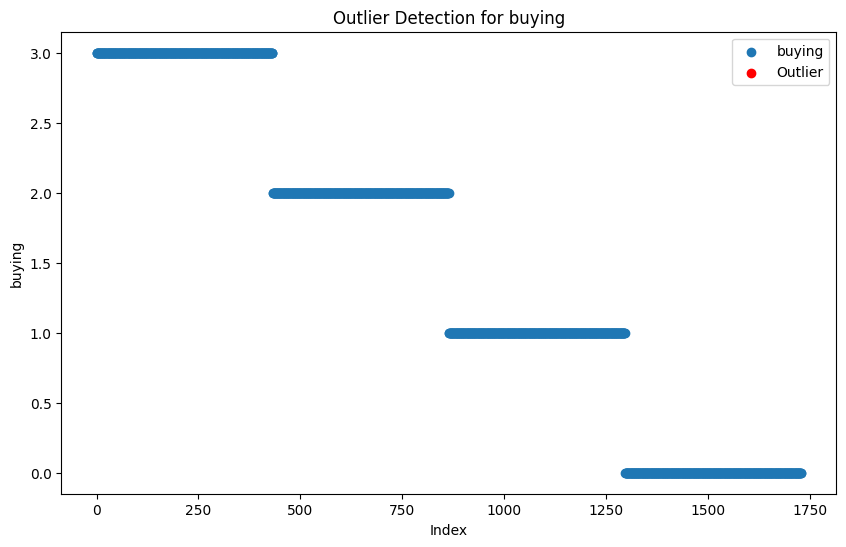

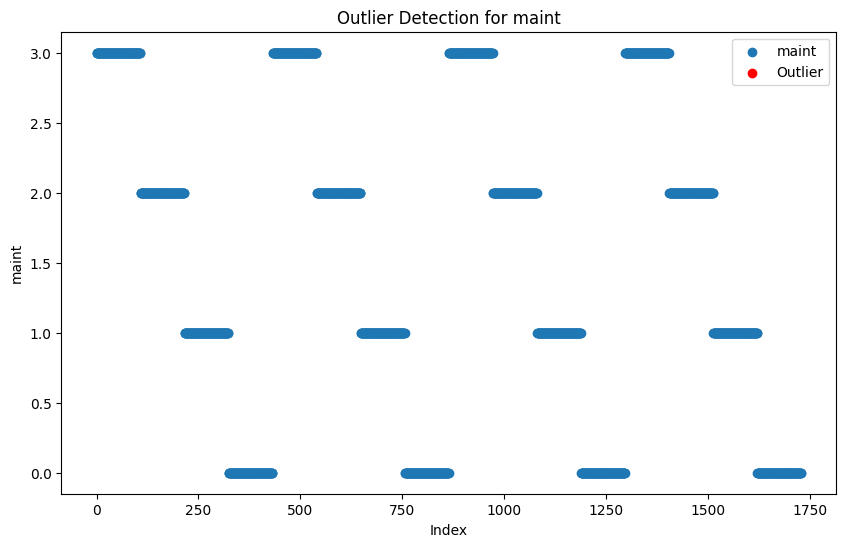

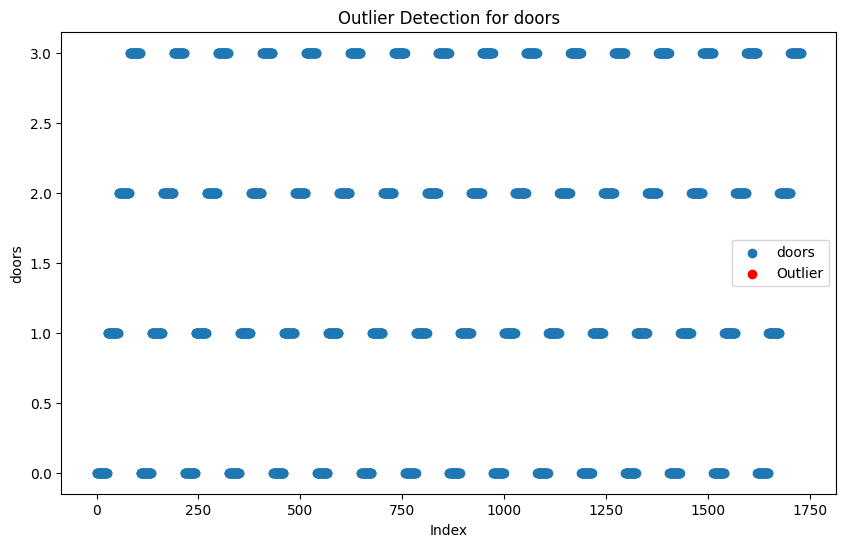

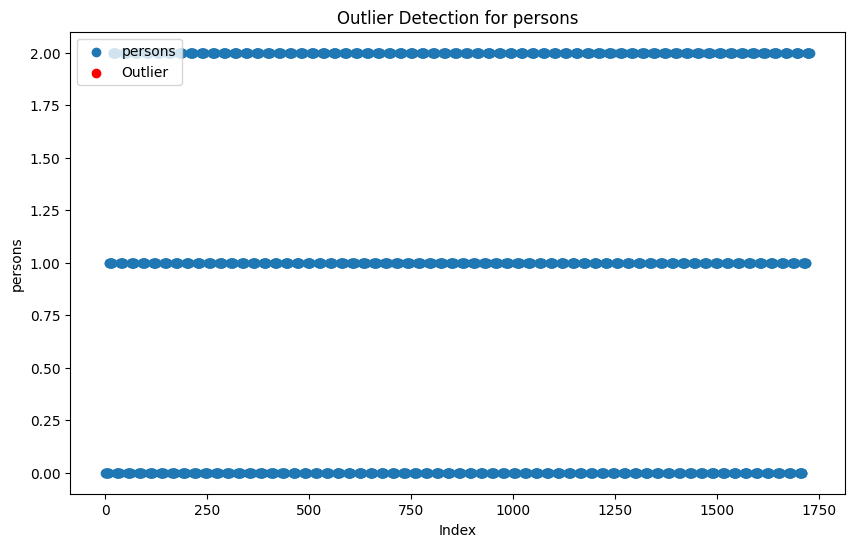

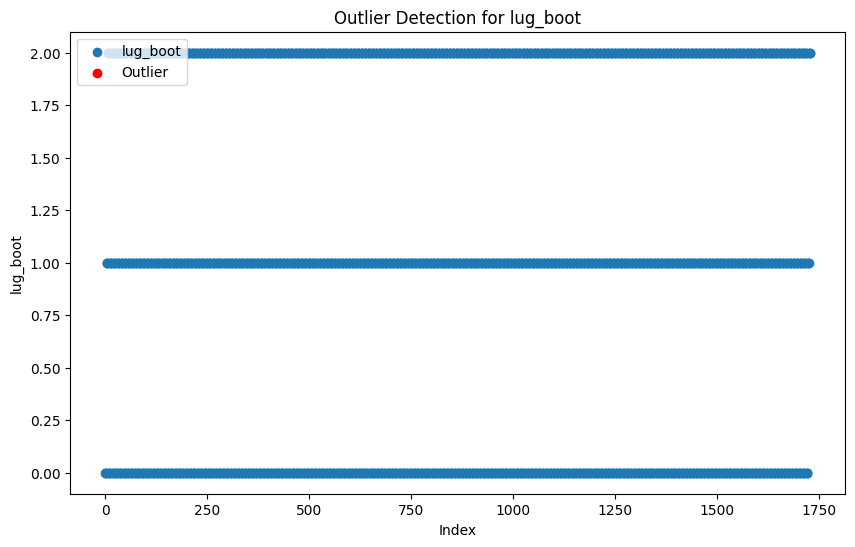

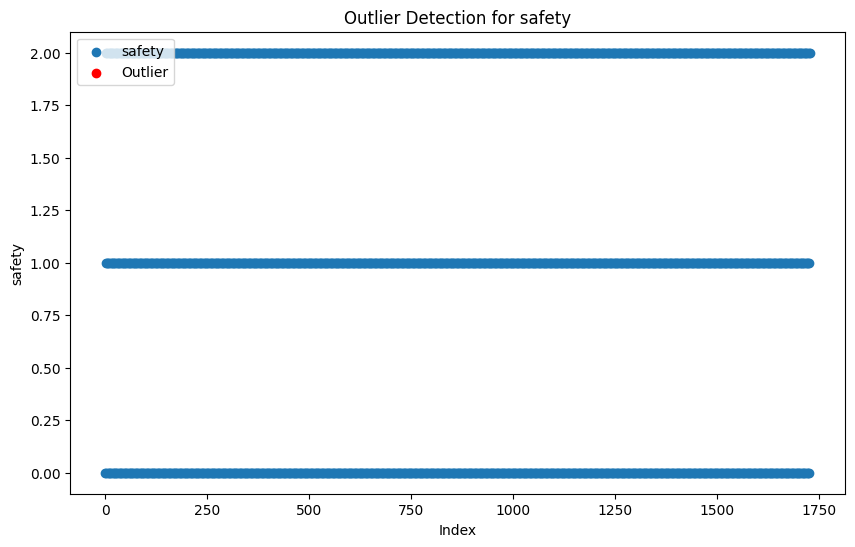

In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Load dataset
car = pd.read_csv("car_eval_trans.csv")

# Define feature names and target name
feature_names = car.columns[:-1].tolist()  # All columns except the last one
target_name = car.columns[-1]              # The last column

# Create LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.013)

# Predict outliers for each numeric feature
outlier_indices = []
for column in feature_names:
    # Get feature values
    feature_values = car[column].values.reshape(-1, 1)
    # Predict outliers
    y_pred = lof.fit_predict(feature_values)
    # Add outlier indices to the list
    outlier_indices.extend([(i, column) for i, label in enumerate(y_pred) if label == -1])

# Remove duplicate outlier indices
outlier_indices = list(set(outlier_indices))

# Display found outlier indices
print("OUTLIER")
for i in outlier_indices:
    print(f"Outlier ditemukan pada baris => {i[0]}, pada kolom fitur => {i[1]}")

# Collect row indices that contain outliers
outlier_row_indices = [index[0] for index in outlier_indices]

# Display data on rows containing outliers
outlier_data = car.iloc[outlier_row_indices]
print("DATA")
print("Data pada baris yang mengandung outlier:")
print(outlier_data)

# Assume you have ground truth labels for outliers
# For example, in this list, value 1 indicates an outlier, and 0 indicates not an outlier
ground_truth_labels = [1 if i in outlier_row_indices else 0 for i in range(len(car))]

# Generate outlier predictions based on outlier_row_indices
predicted_labels = [1 if i in outlier_row_indices else 0 for i in range(len(car))]

# Calculate precision
precision = precision_score(ground_truth_labels, predicted_labels)

# Visualize outliers for each numeric feature
for column in feature_names:
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(car[column])), car[column], label=column)
    outlier_indices_for_column = [i[0] for i in outlier_indices if i[1] == column]
    plt.scatter(outlier_indices_for_column, car[column].iloc[outlier_indices_for_column], color='r', label="Outlier")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.title(f"Outlier Detection for {column}")
    plt.legend()
    plt.show()

Hasil menujukkan bahwa tidak ada outlier pada dataset car evaluation, hal ini dikarenakan semua tipe data pada dataset adalah kategorikal ordinal sehingga value dari satu sama lain berada di dalam jangkauan yang teratur. pada dataset yang sudah saya transformasi saya set nilainya 0, 1, 2, dan 3.

# Modelling untuk prediksi kelayakan mobil

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.Untuk modelling kali ini bertujuan untuk menentukan class pada suatu data inputan .Data akan dibagi menjadi 2 tipe yaitu data test dan data train dan pemodelan kali ini menggunakan metode Gaussian Naive Bayes.

saya akan menentukan class dari data yang akan kita inputan apakah termasuk class unacc, acc, good, atau vgood.

## Konsep Gaussian Naive Bayes

1. Bagi Dataset menjadi data test dan data train

ada dua jenis pembagian rasio dataset yang sering digunakan yaitu 

- 80% data train dan 20% data test

- 70% data train dan 30% data test

Untuk kali ini kita akan menggunkan raiso 80% data train dan 20% data test,namun kalian bisa mengubahnya tergantung situasi dan kondisi dilapangan nantinya

2. Mengghitung Probabilitas pada data train

lakukan perhitungan probabilitas dari masing-masing kelas sesuai dengan jumlah data train pada kelas tersebut kemudian dibagi dengan banyaknya total data train

ini digunakan untuk menghitung Prior

<img src="car_eval/perior.png" width="" align="" />

3. Menghitung Mean dan Standart dev

hitung mean dan standart deviasi setiap fitur pada setiap kelas di data train kita 

4. membuat inputan

kita akan mengambil satu data acak pada data test kita untuk inputan

5. menghitung Distribusi gausian

lakukan perhitungan dengan rumus distribusi gaussian dengan rumus sebagai berikut

<img src="car_eval/distribusi_gaus.png" width="" align="" />

<img src="car_eval/ket_dis_gaus.png" width="" align="" />

6. hitung posterior

Setelah didapat semua hasil dari distribusi gaussian, langkah selanjutnya adalah menentukan posteriori-nya. Berikut ini untuk rumusnya :

<img src="car_eval/posterior.png" width="" align="" />

P(A|Hi) : hasil perkalian setiap fitur pada setiap kelas

P(a) : probabilitas setiap kelas

posteriori = P(A|Hi) * P(a)

7. tentukan maximum posterior

setelah kita menghitung semua posterior maka dapat kita cari mana yang terbesar

data posterior paling besar tersebut yang merupakan akan menjadi class dari data yang kita inputkan 

## Implementasi Gaussian Naive Bayes

In [17]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = pd.read_csv("car_eval_trans.csv")

# memisahkan atribut dan label
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]   # Kolom terakhir sebagai label
 
# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# membuat model Gaussian naive bayes
gnb_model = GaussianNB()
 
# Melatih model dengan menggunakan data latih
gnb_model = gnb_model.fit(X_train, y_train)

y_pred = gnb_model.predict(X_test)

In [18]:
print("=========================== X TRAINING =================================") 
X_train

=========================== X TRAINING =================================


,buying,maint,doors,persons,lug_boot,safety
1649,0,0,1,0,0,2
1465,0,2,2,0,2,1
361,3,0,1,1,0,1
315,3,1,3,2,0,0
1372,0,3,2,2,1,1
...,...,...,...,...,...,...
835,2,0,2,2,2,1
1216,1,0,1,0,0,1
1653,0,0,1,0,2,0
559,2,2,0,2,0,1


In [19]:
print("=========================== X TRAINING =================================") 
y_train

=========================== X TRAINING =================================


1649    0
1465    0
361     0
315     0
1372    1
       ..
835     1
1216    0
1653    0
559     0
684     0
Name: class, Length: 1382, dtype: int64

In [20]:
print("=========================== X TESTING =================================") 
X_test

=========================== X TESTING =================================


,buying,maint,doors,persons,lug_boot,safety
1318,0,3,0,2,1,1
124,3,2,0,1,2,1
648,2,1,0,0,0,0
249,3,1,1,0,2,0
1599,0,1,3,0,2,0
...,...,...,...,...,...,...
1481,0,2,2,2,1,2
1327,0,3,1,0,1,1
317,3,1,3,2,0,2
142,3,2,1,0,2,1


In [21]:
print("=========================== Y TESTING =================================") 
y_test

=========================== Y TESTING =================================


1318    0
124     0
648     0
249     0
1599    0
       ..
1481    3
1327    0
317     1
142     0
427     1
Name: class, Length: 346, dtype: int64

Uji coba inputan dengan data test menggunakan model yang kita buat

In [22]:
print("Data yang akan digunakan untuk menguji :")
print(data.iloc[648])

print("data yang diinputkan merupakan class=",gnb_model.predict([data.iloc[648][:-1]]))

Data yang akan digunakan untuk menguji :
buying      2
maint       1
doors       0
persons     0
lug_boot    0
safety      0
class       0
Name: 648, dtype: int64
data yang diinputkan merupakan class= [0]
/shared-libs/python3.11/py/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Dari hasil prediksi data tersebut termasuk ke dalam kelas 0 (unacc). Jawabannya benar karena data yang diambil merupakan bagian dari data test yang telah dibagi pada model dan termasuk kedalam kelas 0 (unacc).

In [23]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
fscore = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

Akurasi: 0.69
Presisi: 0.75
Recall: 0.69
F-Score: 0.69


Dari hasil model gaussian naive bayes mendapatkan akurasi hanya 69%. Dimana model tersebut belumlah layak untuk melakukan prediksi karena dari 346 data testing model hanya menebak 69% data dengan kelas yang benar benar atau 238 data tebakan benar. Akurasi model yang baik adalah berada di atas 80%.

Referensi jiawei hen; Micheline Kamber; Jian Pei;. (n.d.). Data Mining Concepts and Techniques,halaman 364-370.

oleh karena itu perlu kita membuat membandingkan dengan metode lain untuk mendapatkan akurasi yang baik. Berikut saya akan mencoba memprediksi menggunakan metode Decision Tree, Random Forest, dan Support Vector Machine.

## Modelling dengan Metode Lain

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred, average='weighted')
recall = recall_score(y_test, dt_pred, average='weighted')
fscore = f1_score(y_test, dt_pred, average='weighted')

# Menampilkan hasil evaluasi DT
print(f'Decision Tree Model Evaluation:')
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

print()

# Random Forest
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')
fscore = f1_score(y_test, rf_pred, average='weighted')

# Menampilkan hasil evaluasi RF
print(f'Random Forest Model Evaluation:')
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

print()

# Support Vector Machine
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, average='weighted')
recall = recall_score(y_test, svm_pred, average='weighted')
fscore = f1_score(y_test, svm_pred, average='weighted')

# Menampilkan hasil evaluasi SVM
print(f'SVM Model Evaluation:')
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

Decision Tree Model Evaluation:
Akurasi: 0.97
Presisi: 0.97
Recall: 0.97
F-Score: 0.97

Random Forest Model Evaluation:
Akurasi: 0.97
Presisi: 0.97
Recall: 0.97
F-Score: 0.97

SVM Model Evaluation:
Akurasi: 0.95
Presisi: 0.95
Recall: 0.95
F-Score: 0.95


Dari hasil perbandingan ke-4 model yaitu GNB, Decision Tree, Random Forest, dan SVM yang mendapat akurasi tertinggi yaitu Random Forest dan Decision Tree. oleh karena itu saya akan menggunakan model Random Forest dengan menggunakan 100 Decision Tree sebagai estimator.

# Peningkatan Model (Ensemble learning)

Meskipun pada single model dengan Decision tree dan Random Forest telah mendapatkan akurasi tinggi yaitu 97%. Namun itu masih kurang efektif dikarenakan untuk memprediksi hanya dilakukan 1 model saja. alih-alih menggunakan 1 model saja akan lebih baik apabila menggunakan banyak model dan nantinya hasil prediksi dari banyak model tersebut dijadikan data baru untuk di masukkan ke dalam meta model sebagai data baru. Untuk melakukan hal tersebut kami akan menggunakan metode ensemble.

## Konsep Ensemble Learning

Ensemble learning adalah teknik machine learning yang menggabungkan beberapa model untuk meningkatkan kinerja prediksi secara keseluruhan. Ada beberapa jenis ensemble learning, masing-masing dengan cara berbeda untuk menggabungkan model-model individual. Berikut adalah jenis-jenis utama ensemble learning:

<img src="car_eval/ensem_learn.png" width="" align="" />

### Bagging (Bootstrap Aggregating)

<img src="car_eval/Bagging.png" width="" align="" />

- Bagging adalah teknik di mana beberapa model pelatihan dibuat dari subset data yang diambil dengan penggantian dari dataset asli (bootstrap sampling).
- Contoh: Random Forest adalah contoh paling terkenal dari metode bagging. Random Forest membuat banyak pohon keputusan dari subset data acak dan menggabungkan hasilnya dengan voting mayoritas untuk klasifikasi atau rata-rata untuk regresi.

### Boosting

<img src="car_eval/boosting.png" width="" align="" />

- Boosting adalah teknik yang menggabungkan beberapa model dengan melatih setiap model baru untuk memperbaiki kesalahan dari model sebelumnya.
- Contoh: AdaBoost, Gradient Boosting, dan XGBoost adalah contoh algoritma boosting. Mereka membangun model secara bertahap, dengan masing-masing model baru difokuskan untuk memperbaiki kesalahan dari model sebelumnya.

### Stacking (Stacked Generalization)

<img src="car_eval/stacking.png" width="" align="" />

- Stacking adalah teknik di mana beberapa model pelatihan (disebut level-0 models) digabungkan oleh model meta (disebut level-1 model). Model meta ini dilatih untuk membuat prediksi akhir berdasarkan prediksi dari level-0 models.
- Contoh: Pada stacking, berbagai model seperti regresi linear, SVM, dan decision tree dapat digabungkan, dan hasil mereka digunakan sebagai input untuk model meta seperti regresi linear atau random forest.

## Implementasi Bagging dengan Random Forest

Seperti yang sudah saya tulis pada bagian "Modelling dengan metode lain" saya akan membuat enseble learning dengan jenis bagging dengan Random Forest sebagai meta model dan Decision Tree sebagai estimatornya.

### Konsep Random Forest

Random Forest adalah algoritma machine learning berbasis ensemble yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini menggabungkan banyak pohon keputusan (decision trees) untuk menghasilkan model yang lebih kuat dan akurat. Pada dasarnya, Random Forest membangun banyak pohon keputusan selama pelatihan dan mengeluarkan kelas (klasifikasi) yang merupakan mode dari kelas (klasifikasi) dari pohon-pohon individu, atau mean prediksi (regresi) dari pohon-pohon individu.

Cara Kerja Random Forest Classification

1. Pembuatan Subset Data:
    - Bootstrap Sampling: Random Forest menggunakan teknik bootstrap sampling untuk membuat beberapa subset dari dataset asli. Setiap subset dipilih dengan pengambilan sampel acak dengan penggantian.
2. Pembentukan Pohon Keputusan:
    - Random Feature Selection: Untuk setiap node dalam pohon keputusan, hanya subset acak dari fitur yang dipertimbangkan untuk membelah data. Ini membantu untuk memastikan bahwa pohon-pohon tersebut tidak terlalu mirip satu sama lain.
    - Tree Building: Setiap subset data digunakan untuk membangun pohon keputusan lengkap tanpa pemangkasan (pruning).
3. Voting:
    - Prediction Aggregation: Setelah semua pohon keputusan telah dibangun, Random Forest melakukan prediksi dengan menggabungkan hasil dari semua pohon. Untuk klasifikasi, hasil akhirnya adalah kelas yang dipilih oleh mayoritas pohon (voting mayoritas). Untuk regresi, hasil akhirnya adalah rata-rata dari semua prediksi pohon.

### Implementasi Random Forest

In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset 
data = pd.read_csv("car_eval_trans.csv")
X = data.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir sebagai fitur
y = data.iloc[:, -1]   # Kolom terakhir sebagai label

# Membagi dataset menjadi data latih & data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=12)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=2)

# Melatih model dengan menggunakan data latih
rf_model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = rf_model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
fscore = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print(f'Presisi: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F-Score: {fscore:.2f}')

Akurasi: 0.98
Presisi: 0.98
Recall: 0.98
F-Score: 0.98


hasil dari model Random Forest dengan estimator sebanyak 100 buah Decision Tree mendapatkan Akurasi sebesar 98%, lebih baik dari akurasi model sebelumnya. Berikut akan saya tes manual dengan data yang diambil dari data test sama seperti yang diujikan pada model Gaussian Naive Bayes. 

In [26]:
# Data baru yang ingin diprediksi
data_baru = {
    'buying': [2],
    'maint': [1],
    'doors': [0],
    'persons': [0],
    'lug_boot': [0],
    'safety': [0]
}

# Membuat DataFrame dari data baru
df_baru = pd.DataFrame(data_baru)

# Melakukan prediksi pada data baru
prediksi_baru = rf_model.predict(df_baru)

# Menampilkan hasil prediksi
print(f'Prediksi untuk data baru: {prediksi_baru[0]}')

Prediksi untuk data baru: 0


# Evaluasi

Dari 5 model yang saya buat, masing-masing mendapatkan akurasi sebagai berikut :

1. Single model Gaussian Naive Bayes
    Akurasi: 0.69
    Presisi: 0.75
    Recall: 0.69
    F-Score: 0.69

2. Single model Decision Tree
    Akurasi: 0.97
    Presisi: 0.97
    Recall: 0.97
    F-Score: 0.97

3. Single model Random Forest
    Akurasi: 0.97
    Presisi: 0.97
    Recall: 0.97
    F-Score: 0.97

4. Single model Support Vector Machine
    Akurasi: 0.95
    Presisi: 0.95
    Recall: 0.95
    F-Score: 0.95

5. Meta model Random Forest
    Akurasi: 0.98
    Presisi: 0.98
    Recall: 0.98
    F-Score: 0.98

Dari kelima model diatas dapat dilihat bahwa model terbaik adalah yang menggunakan meta model Random Forest karena mendapatkan akurasi tertinggi dari kelima model yang telah dibuat. Tahap selanjutnya adalah menyimpan model dan siap untuk melakukan deploy dengan model tersebut.

# Deployment

Setelah saya membuat model maka tahap selanjutnya adalah melakukan deployment untuk model kita. Hal ini bertujuan supaya model yang kita buat dapat digunakan oleh calon pebeli mobil dalam mengevaluasi mobil tersebut layak untuk dibeli atau tidak. 

Library yang saya gunakan adalah streamlit karena selain memudahkan dalam membuat UI untuk inputan user, streamlit juga menyediakan tempat hosting secara gratis. 

## Menyimpan Model Random Forest

In [27]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

## Integrasi model dengan web app

1. install library Streamlit, dengan menjalankan perintah "pip install streamlit" pada terminal.
2. membuat file berekstensi .py, misal app.py.
3. didalam app.py saya panggil model yang telah disimpan.
3. setelah itu saya membuat tampilan inforasi keterangan tentang inputan dan hasil evaluasi. selain itu saya juga membuat tampilan form untuk user menginputkan data yang akan diprediksi oleh model berserta tampilan untuk hasil prediksi. untuk tampilan saya masukkan code nya didalam file app.py juga, karena dimudahkan oleh library streamlit.

Source code yang telah saya buat dapat diakses melalui link berikut :
https://github.com/Glendy1208/car_evaluation_random_forest

## Hasil Web

Berikut adalah halaman informasi dari keterangan inputan dan hasil dari evaluasi

<img src="car_eval/halaman_keterangan.png" width="" align="" />

Berikut adalah form untuk user menginputkan data mobil yang ingin dievaluasi oleh model

<img src="car_eval/halaman_input.png" width="" align="" />

## Cara Deploy di Streamlit

1. Buat file requirement.txt
- ketik perintah "pip install pipreqs" pada terminal
- setalh install ketik perintah "pipreqs" pada terminal
- setelah itu maka dengan otomatis akan ada file requirement.txt beserta dengan library yang dibutuhan oleh aplikasi kita.

<img src="car_eval/pipreqs.png" width="" align="" />

2. Upload folder project aplikasi ke GitHub
3. Login ke akun streamlit, apabila belum memiliki lakukan proses registrasi terlebih dahulu.
4. klik tombol "Create app" di pojok kanan atas

<img src="car_eval/create-app.png" width="" align="" />

5. isi form deploy untuk informasi aplikasi kita

<img src="car_eval/deploy_form.png" width="" align="" />

6. klik tombol "Deploy", dan tunggu hingga proses deploy selesai.
7. setelah selesai kita akan diarahkan ke halaman aplikasi kita.

# URL Halaman Aplikasi 

untuk url halaman dari aplikasi Sistem Penilaian Kelayakan Pembelian Mobil Menggunakan Metode Random Forest dapat diakses pada halaman berikut :

https://uas-pendat-glendy-22-076.streamlit.app/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=79495dc5-cec1-4211-98f1-18aff84df654' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>